In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from __future__ import unicode_literals
from hazm import *

In [3]:
divar = pd.read_csv("divar_posts_dataset.csv")

In [4]:
divar

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN
2,2,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,63194439667302,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN
5,5,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 09PM,بسیارتمیزوسالم وچوب راش فقط به علت جابه جایی و...,48029048440635,4,NaN,mobile,1000000,مبل استیل,NaN,NaN
6,6,False,NaN,vehicles,parts-accessories,NaN,Tehran,Tuesday 10PM,خازن ۳۰ فاراد . Q.PERTORS . تمیز 20 ولت,44297825572265,2,NaN,mobile,50000,خازن فروشی,NaN,NaN
7,7,False,NaN,for-the-home,utensils-and-appliances,cookware-tableware,Tehran,Wednesday 02AM,مولینکس فرانسه،اكبند ،١٢ نفره،جديد،با جعبه،sms...,57866479651839,2,NaN,mobile,180000,پلوپز،بخارپز اتوماتیک مولینکس,NaN,NaN
8,8,False,سایر,vehicles,cars,light,Tehran,Wednesday 04AM,دوگانه ال پی جی بیمه با تخفیف دارد \nتودوزی نو...,59878876364899,3,180000.0,mobile,-1,پاترول شش سیلندر چهار درب,NaN,1366
9,9,False,NaN,for-the-home,utensils-and-appliances,cookware-tableware,Tehran,Wednesday 05AM,دیگ مسی کف ٥٧ دهنه ٤٣ ارتفاع ٢٧ سانتیمتر,59047189532833,1,NaN,mobile,300000,دیگ مسی ٤٠ ساله,NaN,NaN


In [4]:
X_train = divar[["desc", "title"]]
y_train = divar[["cat1", "cat2", "cat3"]]

In [6]:
len(X_train.title.values)

947635

In [5]:
normalizer = Normalizer()


In [8]:
X_train.loc[:, "title"] = X_train["title"].str.replace("[^\w\s]", '')
X_train.loc[:, "desc"] = X_train["desc"].str.replace("[^\w\s]", '')
X_train.loc[:, "desc"] = X_train["desc"].str.replace("\n", " ")
X_train.loc[:, "title"] = X_train["title"].apply(lambda x: " ".join(x.lower() for x in x.split(" ")))
X_train.loc[:, "desc"] = X_train["desc"].apply(lambda x: " ".join(x.lower() for x in x.split(" ")))

/home/amirmohammad/tutorial-env/lib/python3.6/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [110]:
feature = [200000,300000,400000,600000,650000,700000,750000,800000,900000,1000000]

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
normalizer = Normalizer()
vectorizer = TfidfVectorizer(preprocessor=normalizer.normalize, tokenizer=word_tokenize, ngram_range=(1, 2), max_features = 300000)
X_train_vect = vectorizer.fit_transform(X_train["title"].values)

In [38]:
vectorizer.get_feature_names()

['_',
 '_ ۳۸',
 '_ ۴۰',
 'a',
 'ace',
 'acer',
 'adidas',
 'adsl',
 'aeg',
 'air',
 'all',
 'anum',
 'apple',
 'apple ۵s',
 'apple ۶s',
 'assassins',
 'asus',
 'a۳',
 'a۳ ۲۰۱۶',
 'a۵',
 'a۵ ۲۰۱۶',
 'a۷',
 'a۷ ۲۰۱۶',
 'a۸',
 'b',
 'batman',
 'black',
 'black ops',
 'blackberry',
 'bmw',
 'box',
 'c',
 'call',
 'call of',
 'canon',
 'casio',
 'cat',
 'cc',
 'cd',
 'cdi',
 'clans',
 'clash',
 'clash of',
 'cng',
 'collection',
 'core',
 'cpu',
 'creed',
 'd',
 'ddr۲',
 'ddr۳',
 'dell',
 'desire',
 'division',
 'dlink',
 'doom',
 'dual',
 'dual sim',
 'duty',
 'duty black',
 'dvd',
 'e',
 'edge',
 'edition',
 'ef۷',
 'ef۷ مدل',
 'elx',
 'ex',
 'e۲',
 'f',
 'farcry',
 'fifa',
 'fifa ۱۶',
 'fifa ۱۷',
 'for',
 'for speed',
 'full',
 'g',
 'g gold',
 'g ۶۱۰',
 'g ۶۳۰',
 'g ۷۰۰',
 'g ۷۳۰',
 'g ۷۵۰',
 'galaxy',
 'galaxy note',
 'gb',
 'gear',
 'gig',
 'gli',
 'glx',
 'go',
 'god',
 'god of',
 'gold',
 'gold ۱۶',
 'gray',
 'gt',
 'g۲',
 'g۳',
 'g۴',
 'g۵',
 'g۶',
 'h',
 'h ۳۰',
 'hd',
 'hdmi',
 '

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
title_vectorizer = CountVectorizer(preprocessor=normalizer.normalize, tokenizer=word_tokenize,stop_words=stopwords_list(), ngram_range=(1, 2), max_features=947327)
X_train_title_vector = title_vectorizer.fit_transform(X_train.title.values)

In [13]:
y_train = y_train.fillna("")


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

In [24]:
c = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
scores = []

In [12]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train_vect, y_train["cat1"])
cross_val_score(clf, X_train_vect, y_train["cat1"], cv = 3).mean()


0.9447909790360143

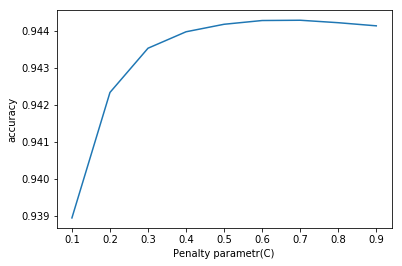

In [26]:
plt.ylabel("accuracy")
plt.xlabel("Penalty parametr(C)")
plt.plot(c,scores)
plt.show()

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)
clf.fit(X_train_vect, y_train["cat1"])
cross_val_score(clf, X_train_vect, y_train["cat1"], cv = 3).mean()

In [15]:
classifier1 = ComplementNB(alpha=0.3333333333333333333)
classifier1.fit(X_train_title_vector,y_train["cat1"])
scores = cross_val_score(classifier1, X_train_title_vector, y_train["cat1"], cv=10)
print(scores.mean())

0.935637666075605


In [17]:
classifier1 = ComplementNB(alpha=0.2)
classifier1.fit(X_train_title_vector,y_train["cat1"])
scores = cross_val_score(classifier1, X_train_title_vector, y_train["cat1"], cv=10)
print(scores.mean())

0.9359151996767354


In [22]:
classifier2 = ComplementNB(alpha=0.15)
classifier2.fit(X_train_title_vector,y_train["cat2"])
scores = cross_val_score(classifier2, X_train_title_vector, y_train["cat2"], cv=10)
print(scores.mean())

0.90453917265083


In [24]:
classifier3 = ComplementNB(alpha=0.2)
classifier3.fit(X_train_title_vector,y_train["cat3"])
scores = cross_val_score(classifier3, X_train_title_vector, y_train["cat3"], cv=10)
print(scores.mean())

0.8731050581721173


In [25]:
dataset = pd.read_csv("phase_2_dataset.csv")
X_test = dataset[["title"]]
X_test.loc[:, "title"] = X_test["title"].str.replace("[^\w\s]", '')
# X_train.loc[:, "desc"] = X_train["desc"].str.replace("[^\w\s]", '')
# X_train.loc[:, "desc"] = X_train["desc"].str.replace("\n", " ")
X_test.loc[:, "title"] = X_test["title"].apply(lambda x: " ".join(x.lower() for x in x.split(" ")))
# X_train.loc[:, "desc"] = X_train["desc"].apply(lambda x: " ".join(x.lower() for x in x.split(" ")))
X_test_vector = title_vectorizer.transform(X_test.title.values)

/home/atenagm/.local/lib/python3.6/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [26]:
cat1 = classifier1.predict(X_test_vector)
cat2 = classifier2.predict(X_test_vector)
cat3 = classifier3.predict(X_test_vector)

In [39]:
pred = []
pred.append(cat3)
pred.append(cat2)
pred.append(cat1)
pred = np.rot90(pred, 3)
pred = pd.DataFrame(pred, columns=["cat1", "cat2", "cat3"])
pred

,cat1,cat2,cat3
0,for-the-home,furniture-and-home-decore,tables-and-chairs
1,electronic-devices,mobile-tablet,tablet
2,for-the-home,furniture-and-home-decore,tv-and-stereo-furniture
3,businesses,equipments-and-machinery,industrial
4,vehicles,cars,light
5,leisure-hobbies,animals,birds
6,personal,health-beauty,
7,electronic-devices,game-consoles-and-video-games,
8,for-the-home,hobby-collectibles,antiques-and-art
9,vehicles,cars,light


In [40]:
pred.to_csv("prediction1.csv")

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
created_at_vectorizer = TfidfVectorizer(preprocessor=normalizer.normalize, tokenizer=word_tokenize, ngram_range=(1, 2), max_features=4800)
created_at_vector = created_at_vectorizer.fit_transform(X_train["created_at"])

In [17]:
city_vectorizer = TfidfVectorizer(preprocessor=normalizer.normalize, tokenizer=word_tokenize, ngram_range=(1, 2), max_features=4800)
city_vector = city_vectorizer.fit_transform(X_train["city"])

In [18]:
platform_vectorizer = TfidfVectorizer(preprocessor=normalizer.normalize, tokenizer=word_tokenize, ngram_range=(1, 2), max_features=4800)
platform_vector = platform_vectorizer.fit_transform(X_train["platform"])

In [10]:
X_train.to_csv("X_train_tokenize_only.csv")

In [12]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
X_train.loc[:, "title"] = title_vectorizer
X_train.loc[:, "desc"] = desc_vectorizer
# X_train.loc[:, "city"] = city_vectorizer
# X_train.loc[:, "platform"] = platform_vectorizer
# X_train.loc[:, "created_at"] = created_at_vectorizer

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
# vectorizer = CountVectorizer(ngram_range=(1, 2))
# x_vector = vectorizer.fit_transform(X_train["title"])
mnb = MultinomialNB()
clf = mnb.fit(X_train, y_train)

TypeError: float() argument must be a string or a number, not 'TfidfVectorizer'

In [4]:
y_train=pd.read_csv("y_train.csv")

In [5]:
y_train

,Unnamed: 0,cat1,cat2,cat3
0,0,for-the-home,furniture-and-home-decore,sofa-armchair
1,1,for-the-home,furniture-and-home-decore,antiques-and-art
2,2,vehicles,cars,heavy
3,3,for-the-home,furniture-and-home-decore,sofa-armchair
4,4,personal,baby-and-toys,personal-toys
5,5,for-the-home,furniture-and-home-decore,sofa-armchair
6,6,vehicles,parts-accessories,NaN
7,7,for-the-home,utensils-and-appliances,cookware-tableware
8,8,vehicles,cars,light
9,9,for-the-home,utensils-and-appliances,cookware-tableware


In [ ]:
del X_train_desc_vector